In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Data mining or Best Associate

### 5% support and 80% confidence

In [29]:
freq_items=apriori(df=book,min_support=0.05,use_colnames=True,max_len=3)
freq_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0640,"(CookBks, GeogBks, ItalCook)"
72,0.0535,"(ArtBks, DoItYBks, RefBks)"
73,0.0585,"(GeogBks, DoItYBks, RefBks)"
74,0.0730,"(ArtBks, GeogBks, DoItYBks)"


In [30]:
best_associate=association_rules(df=freq_items,metric='lift',min_threshold=0.8)
best_associate


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
289,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
290,"(GeogBks, RefBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
291,(ArtBks),"(GeogBks, RefBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
292,(GeogBks),"(ArtBks, RefBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866


In [31]:
best_associate[best_associate.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
289,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
290,"(GeogBks, RefBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
291,(ArtBks),"(GeogBks, RefBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
292,(GeogBks),"(ArtBks, RefBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866


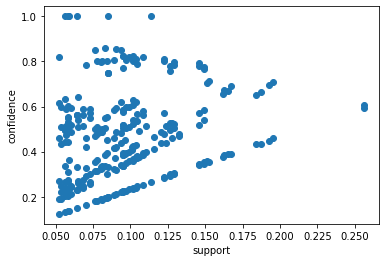

In [32]:
plt.scatter(best_associate['support'],best_associate['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# 10% support and 90% confidence

In [33]:
freq_items2=apriori(df=book,min_support=0.1,use_colnames=True,max_len=2)
freq_items2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [34]:
best_asso2=association_rules(df=freq_items2,metric='lift',min_threshold=0.5)
best_asso2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


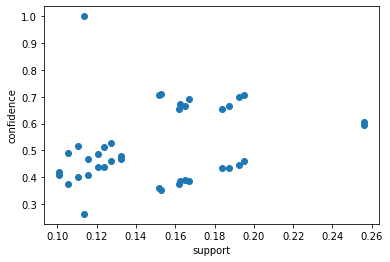

In [35]:
plt.scatter(best_asso2['support'],best_asso2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [36]:
best_asso2.to_csv('Best_Associate_of_books.csv')